# In this workshop I worked with CNN to classify images (normal and sick people)

# to download dataset see the following link
# https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import cv2

In [2]:
#On deux classe les images pour personnes normales et malades

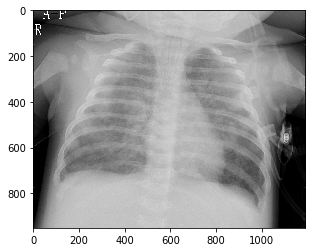

In [3]:
# image (personne malade)
import matplotlib.pyplot as plt
image_personne_malade=cv2.imread("val/PNEUMONIA/person1952_bacteria_4883.jpeg")
plt.imshow(image_personne_malade)


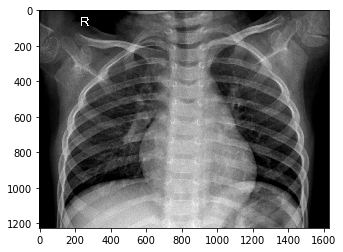

In [4]:
# image (personne normal)
image_personne_normal=cv2.imread("val/NORMAL/NORMAL2-IM-1440-0001.jpeg")
plt.imshow(image_personne_normal)

In [5]:
# Initialising the CNN
classifier = Sequential()

In [6]:
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [7]:

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('dataset/training_set',target_size = (64, 64),batch_size = 32,class_mode = 'binary')
test_set = test_datagen.flow_from_directory('dataset/test_set',target_size = (64, 64),batch_size = 32,class_mode = 'binary')
histto=classifier.fit(training_set,epochs = 10,validation_data = test_set)


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/10
163/163 [==============================] - 91s 558ms/step - loss: 0.3584 - accuracy: 0.8401 - val_loss: 0.3895 - val_accuracy: 0.8189
Epoch 2/10
163/163 [==============================] - 91s 558ms/step - loss: 0.2217 - accuracy: 0.9089 - val_loss: 0.4277 - val_accuracy: 0.8173
Epoch 3/10
163/163 [==============================] - 93s 571ms/step - loss: 0.1951 - accuracy: 0.9233 - val_loss: 0.3085 - val_accuracy: 0.8750
Epoch 4/10
163/163 [==============================] - 90s 554ms/step - loss: 0.1745 - accuracy: 0.9308 - val_loss: 0.2457 - val_accuracy: 0.9071
Epoch 5/10
163/163 [==============================] - 96s 591ms/step - loss: 0.1671 - accuracy: 0.9304 - val_loss: 0.3417 - val_accuracy: 0.8766
Epoch 6/10
163/163 [==============================] - 92s 567ms/step - loss: 0.1652 - accuracy: 0.9340 - val_loss: 0.4156 - val_accuracy: 0.8494
Epoch 7/10
163/163 [===========================

In [9]:
# Part 3 - Making new predictions
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('val/PNEUMONIA/person1952_bacteria_4883.jpeg', target_size = (64, 64))
# test_image = image.load_img('val/NORMAL/NORMAL2-IM-1440-0001.jpeg', target_size = (64, 64))

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'PNEUMONIA'
else:
    prediction = 'NORMAL'

print(prediction)

PNEUMONIA


In [10]:
# Part 3 - Making new predictions
import numpy as np
from keras.preprocessing import image
# test_image = image.load_img('val/PNEUMONIA/person1952_bacteria_4883.jpeg', target_size = (64, 64))
test_image = image.load_img('val/NORMAL/NORMAL2-IM-1440-0001.jpeg', target_size = (64, 64))

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'PNEUMONIA'
else:
    prediction = 'NORMAL'

print(prediction)

NORMAL


In [8]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1